# Making a Manim Animation of N-body orbits

In [201]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from manim import *
import pandas as pd

In [202]:
# Get the plotting time for the animations
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

In [203]:
# load data output by orbit_run.py
bumblebee = pd.read_csv("ThreeBodybumblebee_output.dat", delimiter=';')
butterflyI = pd.read_csv("ThreeBodyButterflyI_output.dat", delimiter=';')
butterflyII = pd.read_csv("ThreeBodyButterflyII_output.dat", delimiter=';')
threebody_flower = pd.read_csv("threebody_flower_output.dat", delimiter=';')
fourbody_flower = pd.read_csv("fourbody_flower_output.dat", delimiter=';')
fourbody_limax = pd.read_csv("fourbody_limax_output.dat", delimiter=';')
fivebody_flower = pd.read_csv("fivebody_flower_output.dat", delimiter=';')

In [204]:
print(bumblebee["body_0_r"][:10])
print(bumblebee["body_1_r"][:10])
print(bumblebee["body_2_r"][:10])

0    1.00000
1    1.00061
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
Name: body_0_r, dtype: float64
0    1.00000
1    1.00061
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
Name: body_1_r, dtype: float64
0    0.0
1    inf
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: body_2_r, dtype: float64


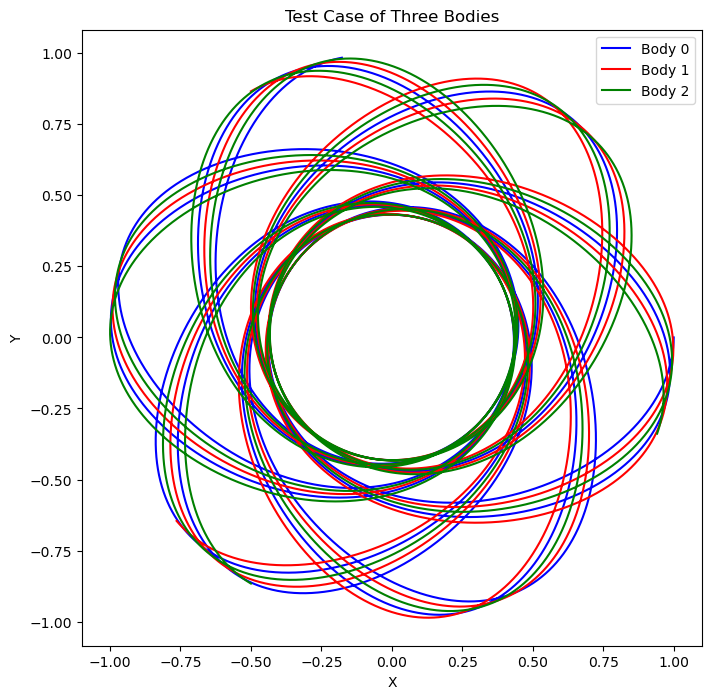

In [205]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(threebody_flower['body_0_r']*np.cos(threebody_flower['body_0_phi']), threebody_flower['body_0_r']*np.sin(threebody_flower['body_0_phi']), color="blue", label = "Body 0")
ax.plot(threebody_flower['body_1_r']*np.cos(threebody_flower['body_1_phi']), threebody_flower['body_1_r']*np.sin(threebody_flower['body_1_phi']), color="red", label = "Body 1")
ax.plot(threebody_flower['body_2_r']*np.cos(threebody_flower['body_2_phi']), threebody_flower['body_2_r']*np.sin(threebody_flower['body_2_phi']), color="green" , label = "Body 2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Test Case of Three Bodies')
ax.legend()
plt.show()


In [206]:
# -------------------------------
# Manim Scene
# -------------------------------
class NBodiesScenepolar(Scene):
    def construct(self):
        t_tracker = ValueTracker(0.0)

        t_grid = t_pts

        orbit_name = butterflyII  # choose which orbit to animate

        r1_grid = orbit_name["body_0_r"]
        r2_grid = orbit_name["body_1_r"]
        r3_grid = orbit_name["body_2_r"]
        #r4_grid = orbit_name["body_3_r"]
        #r5_grid = orbit_name["body_4_r"]
    
        phi1_grid = np.unwrap(orbit_name["body_0_phi"].values)
        phi2_grid = np.unwrap(orbit_name["body_1_phi"].values)
        phi3_grid = np.unwrap(orbit_name["body_2_phi"].values)
        #phi4_grid = np.unwrap(orbit_name["body_3_phi"].values)
        #phi5_grid = np.unwrap(orbit_name["body_4_phi"].values)

        def r1_of(t):
            return np.interp(t, t_grid, r1_grid)
        def r2_of(t):
            return np.interp(t, t_grid, r2_grid)
        def r3_of(t):
            return np.interp(t, t_grid, r3_grid)
        #def r4_of(t):
        #    return np.interp(t, t_grid, r4_grid)
        #def r5_of(t):
        #    return np.interp(t, t_grid, r5_grid)
        
        def phi1_of(t):
            return np.interp(t, t_grid, phi1_grid)
        def phi2_of(t):
            return np.interp(t, t_grid, phi2_grid)
        def phi3_of(t):
            return np.interp(t, t_grid, phi3_grid)
        #def phi4_of(t):
        #    return np.interp(t, t_grid, phi4_grid)
        #def phi5_of(t):
        #    return np.interp(t, t_grid, phi5_grid)
        
        # ---- Scene layout ----

        # Mass blocks (centered vertically, move along x only)
        mass1 = Circle(radius=0.1, color=YELLOW_A, fill_opacity=1)
        mass2 = Circle(radius=0.1, color=ORANGE, fill_opacity=1)
        mass3 = Circle(radius=0.1, color=RED_A, fill_opacity=1)
        #mass4 = Circle(radius=0.1, color=BLUE_A, fill_opacity=1)
        #mass5 = Circle(radius=0.1, color=GREEN_A, fill_opacity=1)

        # Scale factor to map physical displacement (in "meters") to scene units
        scale = 2  # feel free to adjust
        
        # Initialize positions at t=0
        mass1.move_to([scale*r1_of(0.0)*np.cos(phi1_of(0.0)), scale*r1_of(0.0)*np.sin(phi1_of(0.0)), 0.0])
        mass2.move_to([scale*r2_of(0.0)*np.cos(phi2_of(0.0)), scale*r2_of(0.0)*np.sin(phi2_of(0.0)), 0.0])
        mass3.move_to([scale*r3_of(0.0)*np.cos(phi3_of(0.0)), scale*r3_of(0.0)*np.sin(phi3_of(0.0)), 0.0])
        #mass4.move_to([scale*r4_of(0.0)*np.cos(phi4_of(0.0)), scale*r4_of(0.0)*np.sin(phi4_of(0.0)), 0.0])
        #mass5.move_to([scale*r5_of(0.0)*np.cos(phi5_of(0.0)), scale*r5_of(0.0)*np.sin(phi5_of(0.0)), 0.0])

        # Updaters for the masses (position vs. t)
        def mass1_updater(mob):
            t = t_tracker.get_value()
            x = scale*r1_of(t)*np.cos(phi1_of(t))
            y = scale*r1_of(t)*np.sin(phi1_of(t))
            mob.move_to([x, y, 0.0])

        def mass2_updater(mob):
            t = t_tracker.get_value()
            x = scale*r2_of(t)*np.cos(phi2_of(t))
            y = scale*r2_of(t)*np.sin(phi2_of(t))
            mob.move_to([x, y, 0.0])

        def mass3_updater(mob):
            t = t_tracker.get_value()
            x = scale*r3_of(t)*np.cos(phi3_of(t))
            y = scale*r3_of(t)*np.sin(phi3_of(t))
            mob.move_to([x, y, 0.0])

        #def mass4_updater(mob):
        #    t = t_tracker.get_value()
        #    x = scale*r4_of(t)*np.cos(phi4_of(t))
        #    y = scale*r4_of(t)*np.sin(phi4_of(t))
        #    mob.move_to([x, y, 0.0])

        #def mass5_updater(mob):
        #    t = t_tracker.get_value()
        #    x = scale*r5_of(t)*np.cos(phi5_of(t))
        #    y = scale*r5_of(t)*np.sin(phi5_of(t))
        #    mob.move_to([x, y, 0.0])

        mass1.add_updater(mass1_updater)
        mass2.add_updater(mass2_updater)
        mass3.add_updater(mass3_updater)
        #mass4.add_updater(mass4_updater)
        #mass5.add_updater(mass5_updater)

        # add a trace to each of the masses to show their trajectories
        trace1 = TracedPath(mass1.get_start, dissipating_time=1, stroke_color=YELLOW_A)
        trace2 = TracedPath(mass2.get_start, dissipating_time=1, stroke_color=ORANGE)
        trace3 = TracedPath(mass3.get_start, dissipating_time=1, stroke_color=RED_A)
        #trace4 = TracedPath(mass4.get_start, dissipating_time=1, stroke_color=BLUE_A)
        #trace5 = TracedPath(mass5.get_start, dissipating_time=1, stroke_color=GREEN_A)
        
        time_readout = DecimalNumber(number=0.0, num_decimal_places=2, include_sign=False).set_font_size(28).to_corner(UR).shift(LEFT*1.1 + DOWN*1.5)
        def time_updater(mob):
            mob.set_value(t_tracker.get_value())
            
        time_readout.add_updater(time_updater)
        
        time_label = Text("t (s) =", font_size=28).next_to(time_readout, LEFT, buff=0.2)
        self.add(time_label, time_readout)
        self.add(mass1, mass2, mass3)
        self.add(trace1, trace2, trace3)
        self.play(t_tracker.animate.set_value(T_total), run_time=T_total, rate_func=linear)

In [207]:
%%manim NBodiesScenepolar
T_total = 10.0

Manim Community v0.19.0

C:\Users\Jorie\AppData\Local\Temp\ipykernel_29608\2280451172.py:109: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().
  time_readout = DecimalNumber(number=0.0, num_decimal_places=2, include_sign=False).set_font_size(28).to_corner(UR).shift(LEFT*1.1 + DOWN*1.5)


[12/11/25 22:38:47] INFO     Animation 0 : Using cached data (hash :                           ]8;id=911769;file://c:\Users\Jorie\anaconda3\envs\n_body_env\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=362176;file://c:\Users\Jorie\anaconda3\envs\n_body_env\Lib\site-packages\manim\renderer\cairo_renderer.py#89\89]8;;\
                             3529212410_4075350513_3543981148)                                                     

                    INFO     Combining to Movie file.                                      ]8;id=546119;file://c:\Users\Jorie\anaconda3\envs\n_body_env\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=347491;file://c:\Users\Jorie\anaconda3\envs\n_body_env\Lib\site-packages\manim\scene\scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=184481;file://c:\Users\Jorie\anaconda3\envs\n_body_env\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=779972;file://c:\Users\Jorie\anaconda3\envs\n_body_env\Lib\site-packages\manim\scene\scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             'C:\Users\Jorie\Documents\N_body_simulations\media\videos\N_b                         
                             ody_simulations\1080p60\NBodiesScenepolar.mp4'                                        
                                                                                                                   

                    INFO     Rendered NBodiesScenepolar                                                ]8;id=276863;file://c:\Users\Jorie\anaconda3\envs\n_body_env\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=463531;file://c:\Users\Jorie\anaconda3\envs\n_body_env\Lib\site-packages\manim\scene\scene.py#255\255]8;;\
                             Played 1 animations                                                                   